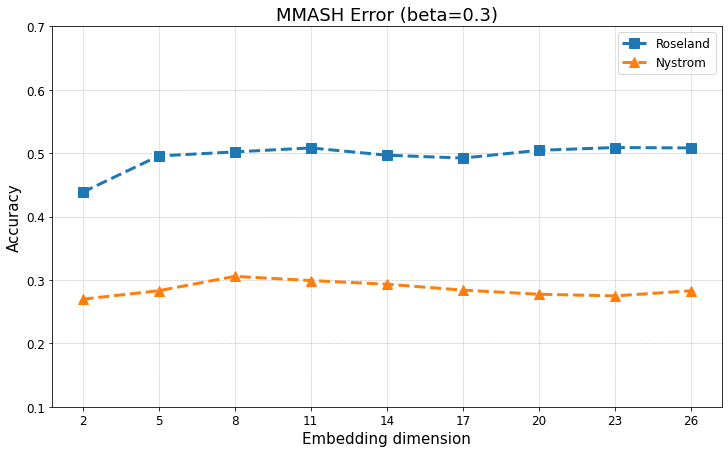

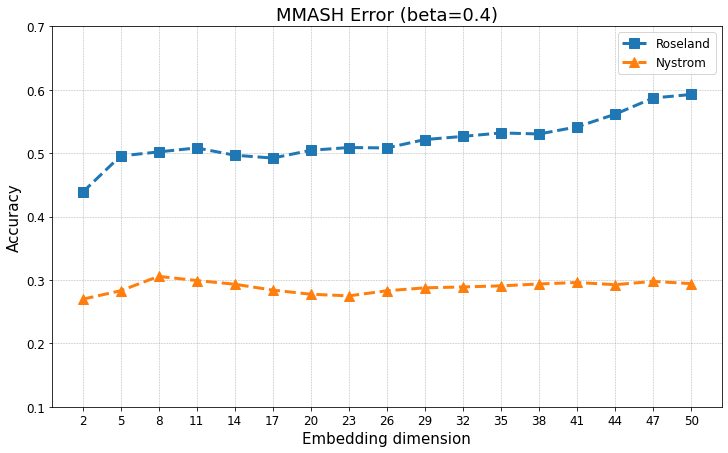

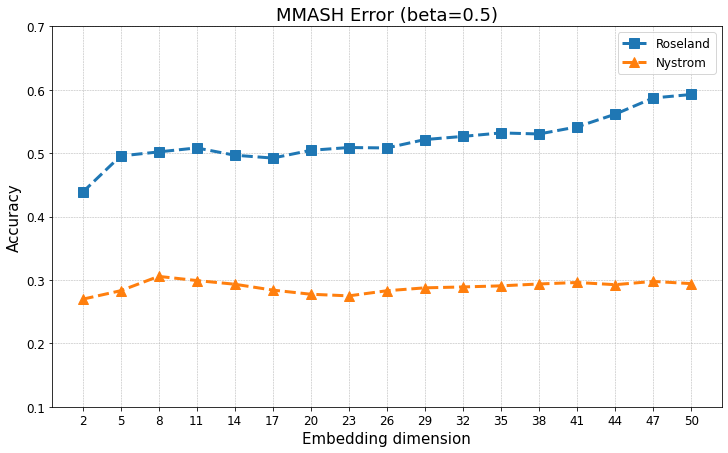

In [49]:
import os
import numpy as np
import matplotlib.pyplot as plt

# These flags determine which data to load
noisy_data = 0
clean_landmark = 0

base_path = os.getcwd()

# Load results
data_type = 'noisy_data' if noisy_data else 'clean_data'
#variants = ('beta0.3', 'beta0.4', 'beta0.5')
variants = ('pca', 'beta0.3', 'beta0.4', 'beta0.5')
acc_data = {}

for variant in variants:
    current_path = os.path.join(base_path, 'new_dataset', 'beta0.3')

    os.chdir(current_path)

    if 'beta' in variant:
        acc_data['acc_nys_' + variant[-3:]] = np.mean(np.load('list_datanys.pkl', allow_pickle = True), axis=0)
        acc_data['acc_roseland_' + variant[-3:]] = np.mean(np.load('list_data.pkl', allow_pickle = True), axis=0)
    else:
        acc_data['acc_' + variant] = np.load('acc_pca.npy')
        #acc_data['acc_' + variant] = np.load('acc_{}.npy'.format(variant.split('.')[0]))

# Plotting
def plot_accuracy(embed_dim, title_suffix, yticks, beta_suffix):
    
    dim = np.arange(2, embed_dim + 1, 3)
    plt.figure(figsize=(12, 7))
    #plt.plot(dim, acc_data['acc_pca'][dim - 1], '--*', markersize=10, linewidth=3, label='PCA')
    # plt.plot(dim, acc_data['acc_dm'][dim - 1], '--o', markersize=10, linewidth=3, label='DM')
    plt.plot(dim, acc_data['acc_roseland_' + beta_suffix][dim - 1], '--s', markersize=10, linewidth=3, label='Roseland')
    plt.plot(dim, acc_data['acc_nys_' + beta_suffix][dim - 1], '--^', markersize=10, linewidth=3, label='Nystrom')
    if 'acc_LLL_' + beta_suffix in acc_data:
        plt.plot(dim, acc_data['acc_LLL_' + beta_suffix][dim - 1], '--+', markersize=10, linewidth=3, label='LLL')

    plt.grid(True, which='both', linestyle='--', linewidth=0.5)
    plt.yticks(yticks)
    plt.xticks(dim)
    plt.gca().set_axisbelow(True)
    plt.gca().tick_params(axis='both', labelsize=12)
    plt.xlabel('Embedding dimension', fontsize=15)
    plt.ylabel('Accuracy', fontsize=15)
    plt.legend(fontsize=12)
    # plt.tight_layout()
    plt.title('MMASH Error (' + title_suffix + ')', fontsize=18)
    plt.show()

# For each beta setting, plot the accuracy

plot_accuracy(27, 'beta=0.3', np.arange(0.1, 0.8, 0.1), '0.3')
plot_accuracy(50, 'beta=0.4', np.arange(0.1, 0.8, 0.1), '0.4')
plot_accuracy(50, 'beta=0.5', np.arange(0.1, 0.8, 0.1), '0.5')






In [ ]:
#beta 0.3
current_path = os.path.join(base_path, 'new_dataset', 'beta0.3')
os.chdir(current_path)
acc_data['acc_nys_' + 'beta0.3'] = np.mean(np.load('acc_nys_physio.npy', allow_pickle = True), axis=0)
acc_data['acc_roseland_' + 'beta0.4'] = np.mean(np.load('acc_roseland_physio.npy', allow_pickle = True), axis=0)
beta_suffix = '0.3'
yticks = np.arange(0.1, 0.8, 0.1)
title_suffix = 'beta=0.3'

dim = np.arange(2, 7 + 1, 3)
plt.figure(figsize=(12, 7))
#plt.plot(dim, acc_data['acc_pca'][dim - 1], '--*', markersize=10, linewidth=3, label='PCA')
# plt.plot(dim, acc_data['acc_dm'][dim - 1], '--o', markersize=10, linewidth=3, label='DM')
plt.plot(dim, acc_data['acc_roseland_' + beta_suffix][dim - 1], '--s', markersize=10, linewidth=3, label='Roseland')
plt.plot(dim, acc_data['acc_nys_' + beta_suffix][dim - 1], '--^', markersize=10, linewidth=3, label='Nystrom')
if 'acc_LLL_' + beta_suffix in acc_data:
    plt.plot(dim, acc_data['acc_LLL_' + beta_suffix][dim - 1], '--+', markersize=10, linewidth=3, label='LLL')

plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.yticks(yticks)
plt.xticks(dim)
plt.gca().set_axisbelow(True)
plt.gca().tick_params(axis='both', labelsize=12)
plt.xlabel('Embedding dimension', fontsize=15)
plt.ylabel('Accuracy', fontsize=15)
plt.legend(fontsize=12)
# plt.tight_layout()
plt.title('MMASH Error (' + title_suffix + ')', fontsize=18)
plt.show()
